In [ ]:
%matplotlib widget
# %matplotlib qt
from bmcs_shell.api import *
from bmcs_cross_section.api import ReinfLayer, MKappa, CustomShape
import numpy as np
import matplotlib.pyplot as plt

# Curved shell with no $e_x$ extension

## Generating sets of wb parameters satisfying geometrical constraints

Note: a special care should be given when choosing the range of parameter $a$ in order to get valid solutions for the defined geometrical constraints (span, total shell height, and width are supported, using None for third variable will, e.g., give solutions with different widths). These target geometrical parameters are for the trimmed shell.

The design variables in `WbParamDesigner` class are based on the following definition: 

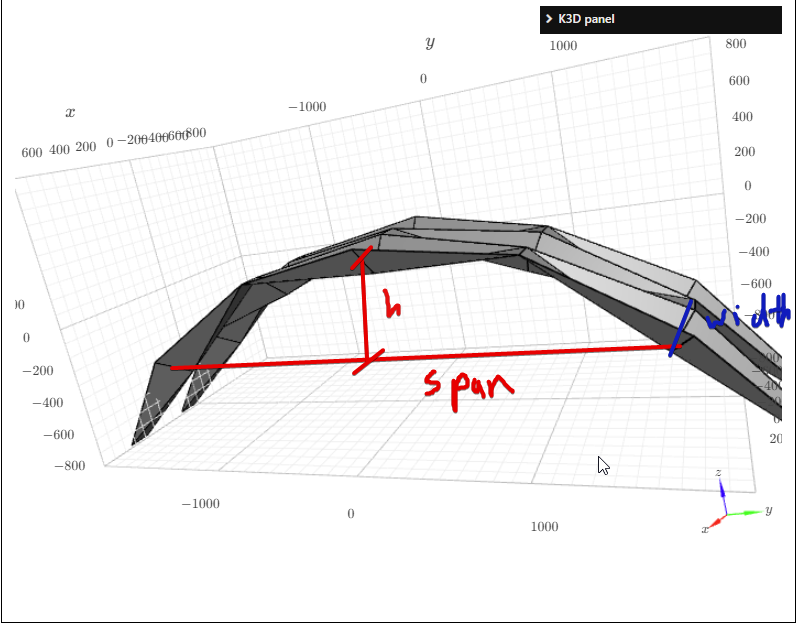

In [ ]:
wb_p = WbParamDesigner(n=20,
                n_mid_cells=4,
                a_range=np.linspace(250, 450, 6),
                gamma_range=np.linspace(10, 85, 20),
                var1={'name':'span', 'value':10000},
                var2={'name':'height', 'value':1300},
#                 var3=None,
              var3= {'name': 'width', 'value': 1200}
                      )
valid_params, fig = wb_p.calc_valid_params()
valid_params

## Optionally, use pre-calculated parameters

In [ ]:
valid_params_4_cells_h_500_w_750 = [
{'a': 250.0,
  'b': 778.5156140208046,
  'c': 193.64894231936165,
  'gamma': 0.7023311707321277,
  'n_phi_plus': 5},
 {'a': 267.5,
  'b': 787.868528948537,
  'c': 215.34718201434754,
  'gamma': 0.5228292692169889,
  'n_phi_plus': 5},
 {'a': 285.0,
  'b': 798.4186002202994,
  'c': 242.13806081314263,
  'gamma': 0.38084683309812295,
  'n_phi_plus': 5},
 {'a': 302.5,
  'b': 810.1769000561173,
  'c': 272.30425729811634,
  'gamma': 0.27036926686368135,
  'n_phi_plus': 5},
 {'a': 320.0,
  'b': 825.2645436427874,
  'c': 303.88385467175044,
  'gamma': 0.1823706613086548,
  'n_phi_plus': 5}
]

valid_params_6_cells_w_750 = [{'a': 200.0,
  'b': 515.1290708768339,
  'c': 179.33603765725562,
  'gamma': 1.3504338917662908,
  'n_phi_plus': 7},
 {'a': 227.5,
  'b': 518.8085910158042,
  'c': 161.22156785833494,
  'gamma': 1.1558110648003872,
  'n_phi_plus': 7},
 {'a': 255.0,
  'b': 531.5932275506739,
  'c': 174.9152719084204,
  'gamma': 0.7568951109876604,
  'n_phi_plus': 7},
 {'a': 282.5,
  'b': 553.4863231622114,
  'c': 217.20935573255764,
  'gamma': 0.4403765256710152,
  'n_phi_plus': 7},
 {'a': 310.0,
  'b': 583.1118956117305,
  'c': 267.4243042644062,
  'gamma': 0.24563754259243212,
  'n_phi_plus': 7}]

In [ ]:
valid_params = valid_params_4_cells_h_500_w_750

## Visualizing

In [ ]:
# params used for the 10 m, and 2 m high bridge on 30.06.2023
valid_params = [{'a': 370.0,
 'b': 1424.698790724043,
 'c': 440,
 'gamma': 0.9987736070194156,
 'n_phi_plus': 5}]

In [ ]:
a = 100
wbt4p = WBTessellation4P(
#                          a=a,
#                          b = 5.492 * a, 
#                          c = 1.8466 * a, 
#                          gamma=np.deg2rad(54.53), 
#                          n_phi_plus=3, 
                        **valid_params[0],
                         n_x_plus=2, 
                         wireframe_width=5,
                         trim_half_cells_along_y=True,
                         trim_half_cells_along_x=True,
                         align_outer_nodes_along_x=True,
)
wbt4p.interact()

In [ ]:
wbt4p = WBTessellation4PEx(
#                          a=a,
#                          b = 5.492 * a, 
#                          c = 1.8466 * a, 
#                          gamma=np.deg2rad(54.53), 
#                          n_phi_plus=3, 
                        **valid_params[0],
    e_x = 100,
                         n_x_plus=2, 
                         wireframe_width=5,
#                          trim_half_cells_along_y=True,
#                          trim_half_cells_along_x=True,
#                          align_outer_nodes_along_x=True,
)
wbt4p.interact()

In [ ]:
WBGeoUtils.export_obj_file(wbt4p, 'span_10000_w_1500_h_2000_a_370_4_cells.obj')

## Checking the exact real geometric values

In [ ]:
wb_p.get_shell_height(wbt4p)

In [ ]:
wb_p.get_shell_width(wbt4p)

In [ ]:
wb_p.get_span(wbt4p)

In [ ]:
wbt4p.wb_cell.R_0

# Curved shell with smaller width to count for $e_x = 10$ cm extends

## Pre-calculated parameters and visualization

In [ ]:
"""Following params:
var1={'name':'span', 'value':6000},
var2={'name':'height', 'value':600},
var3= {'name': 'width', 'value': 600}

I chose solution index 2 and exported it Rhino and put it in MK below
"""

valid_params_h_600_w_600 = [{'a': 170.0,
  'b': 775.4685979010064,
  'c': 159.7062911076168,
  'gamma': 0.9512672619506469,
  'n_phi_plus': 5},
 {'a': 183.33333333333334,
  'b': 778.0593498508921,
  'c': 161.8054713744883,
  'gamma': 0.8055464977442098,
  'n_phi_plus': 5},
 {'a': 196.66666666666666,
  'b': 782.2842797521943,
  'c': 170.71256517251996,
  'gamma': 0.6503708616972348,
  'n_phi_plus': 5},
 {'a': 210.0,
  'b': 786.86144244743,
  'c': 185.29979839477315,
  'gamma': 0.5075723062898361,
  'n_phi_plus': 5}]

valid_params = valid_params_h_600_w_600

In [ ]:
a = 100
wbt4p_ex = WBTessellation4PEx(
#                          a=a,
#                          b = 5.492 * a, 
#                          c = 1.8466 * a, 
#                          gamma=np.deg2rad(54.53), 
#                          n_phi_plus=3, 
                        **valid_params[2],
                         n_x_plus=3, 
                        e_x = 100,
                         wireframe_width=5,
)
wbt4p_ex.interact()

In [ ]:
WBGeoUtils.export_obj_file(wbt4p_ex, 'h_600_w_600_index_2_ex_100.obj')

In [ ]:
fig, ax = wbt4p_ex.plot_formwork_plan()

In [ ]:
# fig.savefig('valid_params_h_600_w_600_index_2_ex_100.pdf')

## Shell with straight edges for easier elements assembly

In [ ]:
wb_p = WbParamDesigner(ss_shell=True, 
                       n =20,
                n_mid_cells=4,
                a_range=np.linspace(350, 390, 4),
                gamma_range=np.linspace(10, 85, 20),
                var1={'name':'span', 'value':10000},
                var2={'name':'height', 'value':2000},
                var3=None,
#               var3= {'name': 'width', 'value': 1500}
                      )
valid_params, fig = wb_p.calc_valid_params()
valid_params

In [ ]:
a = 100
wbt4p = WBTessellation4PSS(
#                          a=350,
#                          b = 1420, 
#                          gamma=0.9323, 
#                          n_phi_plus=3, 
                        **valid_params[3][0],
                         n_x_plus=2,
                         wireframe_width=5,
                         trim_half_cells_along_y=True,
                         trim_half_cells_along_x=True,
                         align_outer_nodes_along_x=True,
)
wbt4p.interact()

In [ ]:
wb_p.get_shell_height(wbt4p)

In [ ]:
wb_p.get_shell_width(wbt4p)

In [ ]:
wb_p.get_span(wbt4p)

## Evaluating cross-section moment capacity using Mk model

In [ ]:
from shapely.geometry import LineString

X_Ia = wbt4p_ex.X_Ia
mask = (X_Ia[:, 1] >= -10) & (X_Ia[:, 1] <= 10)
shell_mid_line = X_Ia[mask][:, (0, 2)]
shell_mid_line = shell_mid_line[shell_mid_line[:, 0].argsort()]

polyline = LineString(shell_mid_line)
thickness = 30

# Extrude the polyline to create a Polygon
extruded_polygon = polyline.buffer(thickness/2, cap_style=2, join_style=2)
x, y = extruded_polygon.exterior.xy
y = np.array(y) - np.min(y)

fig, ax = plt.subplots()
ax.plot(shell_mid_line[:, 0], shell_mid_line[:, 1], color='red')
ax.fill(x, y, edgecolor='black')
ax.set_aspect('equal')
fig.show()

In [ ]:
lower_cs_part_width = reinf_layers* 220
lower_cs_part_reinf_A = int(lower_cs_part_width / roving_dist) * roving_area
lower_cs_part_reinf_A

In [ ]:
mc = MKappa(high_kappa = 0.0002, n_kappa = 40)
mc.cs_design.matrix_.f_cm=90
mc.cross_section_shape = 'custom'

cs_points = np.column_stack((x, y))
# cs_points[:, 1] += 500
mc.cross_section_shape_.cs_points = cs_points

roving_dist = 38
roving_area = 3.62
h = np.max(cs_points[:, 1]) - np.min(cs_points[:, 1])

reinf_layers = 2

# add 1st (bottom) layer
lower_cs_part_width = reinf_layers * 3 * 220
lower_cs_part_reinf_A = int(lower_cs_part_width / roving_dist) * roving_area

r1 = ReinfLayer(name='bot_layer', z=10, A=lower_cs_part_reinf_A, matmod='carbon')
r1.matmod_.trait_set(E=245000, f_t=3800)
mc.cross_section_layout.add_layer(r1)

# add 2st (top) layer
upper_cs_part_width = reinf_layers * 2 * 600
upper_cs_part_reinf_A = int(upper_cs_part_width / roving_dist) * roving_area

r2 = ReinfLayer(name='top_layer', z=h-5, A=upper_cs_part_reinf_A, matmod='carbon')
r2.matmod_.trait_set(E=245000, f_t=3800)
mc.cross_section_layout.add_layer(r2)

# Carbon grid
vertical_layers_num = int(h/roving_dist)
for i, z in enumerate(np.linspace(5, h-5, vertical_layers_num)):
    if i != 0 and i != vertical_layers_num-1:
        rl = ReinfLayer(name='C_grid_' + str(i + 1), z=z, A=2 * roving_area, matmod='carbon')
        rl.matmod_.trait_set(E=245000, f_t=3800)
        mc.cross_section_layout.add_layer(rl)

mc.interact()

# Skew shell

In [ ]:
valid_params[2]

In [ ]:
wbttpv2.wb_cell_.callback_fun = wbttpv2.update_plot_
# wbttpv2.wb_cell_.gamma = valid_params[2]['gamma']

In [ ]:
wbttpv2 = WBTessellation5PBeta(wb_cell_=WBCell5ParamBeta(gamma = 0.9, beta_1= 0), sol_num=4, n_x = 5, n_y = 5)

wbttpv2.interact()

In [ ]:
# WBGeoUtils.export_obj_file(wbttpv2, 'wb_tested_3cells_mid_shifted.obj')

## Generating graphics

In [ ]:
# Cameras for k3d
# [
#  x1,y1,z1, # position of the camera in xyz space
#  x2,y2,z2, # the point where camera is currently looking at
#  x3,y3,z3  # orientation (up direction), this vector cannot be [0,0,0])
# ]
shell_perspective = [92989.64822524686, -70795.1623293042, 31459.457304330528,
                     0, 0, -202.457763671875,
                     -0.19436494432910192, 0.0869502251902479, 0.9770680256539523]
shell_front_view = [140000, -3000, -1000,
                    0,     0, -200,
                    0,     0,   1]
shell_top_view = [0, -10000, 140000, 0, 0, -200, -1, 0, 0]

In [ ]:
wbt4p = WBTessellation4P(a =125,  b = 550, c = 175, gamma=np.deg2rad(46), n_phi_plus=3, n_x_plus=2, wireframe_width=4)
wbt4p.interact()
k3d_plot = wbt4p.pb.plot_fig

k3d_plot.camera_fov = 1
k3d_plot.screenshot_scale = 5.5
k3d_plot.grid_visible = False
k3d_plot.camera = shell_perspective
# k3d_plot.camera = shell_front_view
# k3d_plot.camera = shell_top_view

# WB Slab

Choosen parameters for first trial with embedded hinges:

wb_shell = WBTessellation4PEx(
                         a=1000,
                         b = 1615, 
                         c = 645, 
                         e_x = 286,
                         gamma=0.683, 
                         n_phi_plus=4, 
                         n_x_plus=3, 
                         wireframe_width=10)

In [ ]:
286/4

In [ ]:
np.pi/2 - 0.683

In [ ]:
wb_shell.X_Ia_trimmed[89]

In [ ]:
wb_shell.X_Ia_trimmed[88]

In [ ]:
wb_shell.X_Ia_trimmed[82]

In [ ]:
wb_shell.X_Ia[36] - wb_shell.X_Ia[48]

In [ ]:
wb_shell = WBTessellation4PEx(
                         a=1000/4,
                         b = 1615/4, 
                         c = 645/4, 
                         e_x = 286/4,
                         gamma=0.75, # original planned gamma = 0.683, the gamma estimated from normals is 0.75, however new CAD comparison shows that the created element is actually closer to 0.683 
                         n_phi_plus=5, 
                         n_x_plus=3, 
                         wireframe_width=5,
                        ##---- Trimming function works only in WBTessellation4P ----##
                         trim_half_cells_along_y=True,
                         trim_half_cells_along_x=True,
#                          align_outer_nodes_along_x=True,
)
wb_shell.interact()

In [ ]:
shell_mid_line[1:-1]

In [ ]:
from shapely.geometry import LineString

X_Ia = wb_shell.X_Ia
mask = (X_Ia[:, 1] >= -10) & (X_Ia[:, 1] <= 10)
shell_mid_line = X_Ia[mask][:, (0, 2)]
shell_mid_line = shell_mid_line[shell_mid_line[:, 0].argsort()][1:-1]

polyline = LineString(shell_mid_line)
thickness = 15

# Extrude the polyline to create a Polygon
extruded_polygon = polyline.buffer(thickness/2, cap_style=2, join_style=2)
x, y = extruded_polygon.exterior.xy
y = np.array(y) - np.min(y)

fig, ax = plt.subplots()
ax.plot(shell_mid_line[:, 0], shell_mid_line[:, 1], color='red')
ax.fill(x, y, edgecolor='black')
ax.set_aspect('equal')
fig.show()

In [ ]:
lower_cs_part_width = reinf_layers* 220
lower_cs_part_reinf_A = int(lower_cs_part_width / roving_dist) * roving_area
lower_cs_part_reinf_A

In [ ]:
mc = MKappa(high_kappa = 0.0002, n_kappa = 40)
mc.cs_design.matrix_.f_cm=80
mc.cross_section_shape = 'custom'

cs_points = np.column_stack((x, y))
# cs_points[:, 1] += 500
mc.cross_section_shape_.cs_points = cs_points

roving_dist = 38
roving_area = 3.62
h = np.max(cs_points[:, 1]) - np.min(cs_points[:, 1])

reinf_layers = 2

# add 1st (bottom) layer
lower_cs_part_width = reinf_layers * 2 * 2 * wb_shell.e_x
lower_cs_part_reinf_A = int(lower_cs_part_width / roving_dist) * roving_area

r1 = ReinfLayer(name='bot_layer', z=10, A=lower_cs_part_reinf_A, matmod='carbon')
r1.matmod_.trait_set(E=245000, f_t=3800)
mc.cross_section_layout.add_layer(r1)

# add 2st (top) layer
upper_cs_part_width = reinf_layers * 2 * 2 * wb_shell.a
upper_cs_part_reinf_A = int(upper_cs_part_width / roving_dist) * roving_area

r2 = ReinfLayer(name='top_layer', z=h-5, A=upper_cs_part_reinf_A, matmod='carbon')
r2.matmod_.trait_set(E=245000, f_t=3800)
mc.cross_section_layout.add_layer(r2)

# Carbon grid
vertical_layers_num = int(h/roving_dist)
for i, z in enumerate(np.linspace(5, h-5, vertical_layers_num)):
    if i != 0 and i != vertical_layers_num-1:
        rl = ReinfLayer(name='C_grid_' + str(i + 1), z=z, A=2 * roving_area, matmod='carbon')
        rl.matmod_.trait_set(E=245000, f_t=3800)
        mc.cross_section_layout.add_layer(rl)

mc.interact()

# dp = DeflectionProfile(mc = mc, n_load_steps = 150)

# dp.beam_design.system = 'simple_beam_dist_load'
# # dp.beam_design.system = 'cantilever_dist_load'
# # dp.beam_design.system = '4pb'

# dp.beam_design.system_.L = 3000

# dp.interact()

In [ ]:
fig, ax = wb_shell.plot_folding_pattern()
fig
# fig.savefig('folding_patt.pdf')

In [ ]:
k3d_plot = wb_shell.pb.plot_fig
k3d_plot.camera = [154.30159594743486, -12415.159049059332, 4593.223829379507, 
                   0, 0, 0, 
                   0, 0, 1]

In [ ]:
# If only wb slab elements are to be investigated use WBTessellation4PExFlat or WBTessellation4PFlat
# WBTessellation4PExFlat().interact()

## Folding path

In [ ]:
wb_shell = WBTessellation4PEx(
                         a=1000,
                         b = 1615, 
                         c = 645, 
                         e_x = 286,
                         gamma=0.683,
                         n_phi_plus=2, 
                         n_x_plus=2, 
                         wireframe_width=10,
                        constraint_node_idx = 6,
                        constraint_coord_idx = 2,
                         trim_half_cells_along_y=True,
                         trim_half_cells_along_x=True
)
wb_shell.interact()

In [ ]:
k3d_plot = wb_shell.pb.plot_fig
k3d_plot.camera = [-217393.07872310898,
 146.03607509389616,
 673.7980419402329,
 0,
 0,
 237.90625,
 0,
 0,
 1]

## Plot points coords diff between flat and folded states

In [ ]:
wb_shell.X_Ia_trimmed

In [ ]:
fig_pattern, _ = wb_shell.plot_formwork_plan(trimmed=False, type='folded')